In [81]:
import graph_tool_extras as gte
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [82]:
# Listar o conteúdo da pasta "Entrega 2"
degree_path = "./Entrega 2/degree.net.gz"
betweenness_path = "./Entrega 2/betweenness.net.gz"

In [83]:
g = gte.load(degree_path)
g2 = gte.load(betweenness_path)

In [84]:
times = [v for v in g.vertices()]
time_names = [g.vp["id"][v] for v in times]
# times_names

In [85]:
degrees = g.get_total_degrees()
print(degrees)

0      48
1      41
2      60
3       4
4      43
       ..
310     1
311     1
312     1
313     1
314     1
Length: 315, dtype: uint64


In [86]:
vertex_ids = [v for v in g2.vertices()]
betweenness_values = [g2.vp.betweenness[v] for v in vertex_ids]
vertex_names = [g2.vp.id[v] for v in vertex_ids]

df_betweenness = pd.DataFrame({
    "club_name": vertex_names,
    "betweenness": betweenness_values
    })

print(df_betweenness)

           club_name  betweenness
0    Manchester City     0.006746
1        Aston Villa     0.007420
2            Chelsea     0.012402
3              Inter     0.000000
4     Manchester Utd     0.005589
..               ...          ...
310   Melbourne City     0.000000
311          SM Caen     0.000000
312     West Ham U21     0.000000
313        FC Empoli     0.000000
314          Tondela     0.000000

[315 rows x 2 columns]


In [87]:
times_degrees = [degrees[int(v)] for v in times]
# times_degrees

In [92]:
df_degree = pd.DataFrame({
    "club_name": time_names,
    "degree": times_degrees
})

df_global = pd.read_csv("data_base.csv")
df_desempenho = df_global[["club_name", "desempenho"]].drop_duplicates()
df_merge = pd.merge(df_degree,df_desempenho, on="club_name")
df_merge2 = pd.merge(df_merge, df_betweenness, on="club_name")
df_merge2.sort_values(by="desempenho", ascending=False)

,club_name,degree,desempenho,betweenness
0,Manchester City,48,19.8,0.006746
4,Liverpool,30,18.2,0.003624
3,Manchester Utd,43,16.6,0.005589
7,Arsenal,37,16.0,0.000000
2,Chelsea,60,15.2,0.012402
8,Tottenham,32,15.0,0.000000
5,Newcastle Utd,28,11.6,0.002548
12,West Ham,31,10.6,0.005861
1,Aston Villa,41,10.4,0.007420
6,Brighton,60,9.6,0.013362


                            OLS Regression Results                            
Dep. Variable:             desempenho   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     33.49
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.63e-06
Time:                        17:41:04   Log-Likelihood:                -104.25
No. Observations:                  36   AIC:                             212.5
Df Residuals:                      34   BIC:                             215.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9717      1.393     -0.698      0.4

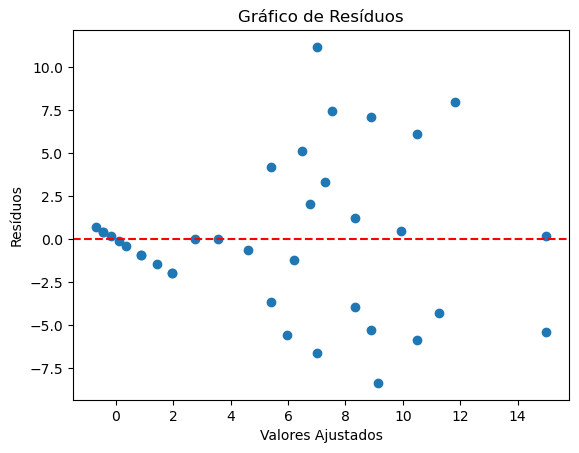

In [95]:
X = sm.add_constant(df_merge["degree"])
y = df_merge["desempenho"]
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

# Gráfico de resíduos
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.savefig("grafico_de_residuos1.png")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             desempenho   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     17.45
Date:                Wed, 14 May 2025   Prob (F-statistic):           6.76e-06
Time:                        17:41:05   Log-Likelihood:                -103.60
No. Observations:                  36   AIC:                             213.2
Df Residuals:                      33   BIC:                             218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5097      1.473     -1.025      

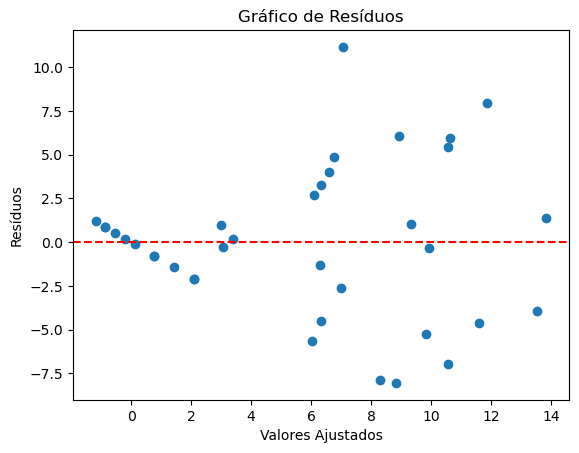

In [96]:
X = sm.add_constant(df_merge2[["degree", "betweenness"]])
y = df_merge2["desempenho"]
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

# Gráfico de resíduos
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.savefig("grafico_de_residuos2.png")
plt.show()